# Feedforward Neural Network

In [2]:
import torch
import matplotlib.pyplot as plt

def draw_function(func, return_fig=False):
    xx = torch.linspace(-5, 5, steps=1000)
    fig = plt.figure()
    plt.plot(xx.numpy(), func(xx).numpy())
    plt.xlabel("x", fontdict={"fontsize":16})
    plt.ylabel("y", fontdict={"fontsize":16}, rotation=0)
    plt.title(f"{func.__name__}", fontdict={"fontsize":20})
    plt.show()

## 활성화 함수

활성화 함수는 이미 torch 내장함수로 구현이 되어있다. 

* `torch.sigmoid`, `torch.tanh`, `torch.relu`

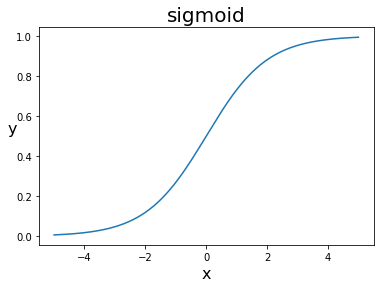

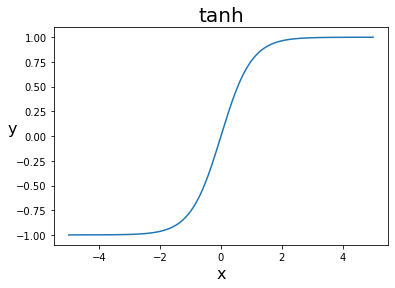

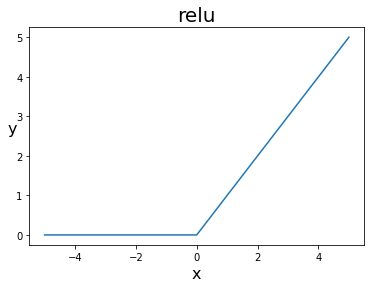

In [ ]:
draw_function(torch.sigmoid)
draw_function(torch.tanh)
draw_function(torch.relu)

#  Forward propagation: XOR 문제 해결하기

<img src="https://drive.google.com/uc?id=1YewQ_5N2GfH-nOaftL1HR90PYVEr9paS">

## 텐서간의 연산으로만 사용해서 XOR 문제 해결하기

In [5]:
torch.manual_seed(70)
# 크기가 (1, 2) 입력 텐서 생성
x = torch.Tensor([[0, 1]])

# Input > Hidden1
# 은닉층 가중치 정의
# 0과 1 사이에서 무작위로 뽑아서 W1, b1 텐서 생성
W1 = torch.rand((3, 2))  
b1 = torch.rand((1, 3))  

# forward
# (1, 2) x (2, 3) + (1, 3) = (1, 3)
z1 = torch.mm(x,W1.T) + b1
print(W1)
a1 = torch.sigmoid(z1)

# Hidden1 > Hidden2
# 은닉층 가중치 정의
# 0과 1 사이에서 무작위로 뽑아서 W2, b2 텐서 생성
W2 = torch.rand((2, 3))  
b2 = torch.rand((1, 2))  

# forward
# (1, 3) x (3, 2) + (1, 2) = (1, 2)
z2 = torch.mm(a1,W2.T) + b2  
a2 = torch.sigmoid(z2)

# Hidden > Output
# 출력층 가중치 초기화
W3 = torch.rand((2, 2))  
b3 = torch.rand((1, 2))

# 출력층 층 forward
# (1, 2) x (2, 2) + (1, 2) = (1, 2)
def identity_func(x):
    """항등 함수"""
    torch.nn.Identity()
    return x

z3 = torch.mm(a2,W3.T) + b3
y = identity_func(z3)

print(y)

tensor([[0.4350, 0.3591],
        [0.3411, 0.2644],
        [0.6656, 0.1341]])
tensor([[1.8293, 1.0240]])


## torch.nn 모듈 사용해서 XOR 문제 해결하기

모든 neural network 관련된 패키지는 `torch.nn` 모듈안에 다 있다. 

Deep Neural Network를 만든다는 것은 아래 그림 처럼 층을 하나하나씩 쌓는 것과 같다.

<img src="https://drive.google.com/uc?id=1SFSokbcGiPEGD1JrGmLpnTjHdndUdEob" >

학습할 매개변수는 구분하여 층을 만들고 그렇지 않은 층(활성화함수)는 하나로 정의하여 재 사용하면 된다.

PyTorch Document: 

* [torch.nn.Linear](https://pytorch.org/docs/stable/nn.html#linear)
* [torch.nn.Sigmoid](https://pytorch.org/docs/stable/nn.html#sigmoid)


In [7]:
torch.manual_seed(70)

import torch.nn as nn

# 선형결합, sigmoid 모듈 선언
linear1 = nn.Linear(2,3)  # y = wx + b   
linear2 = nn.Linear(3, 2)
linear3 = nn.Linear(2, 2)
activation_layer = nn.Sigmoid()
identity_layer = nn.Identity()

# forward 과정
x = torch.Tensor([[0, 1]])
z1 = linear1(x)
a1 = activation_layer(z1)
z2 = linear2(a1)
a2 = activation_layer(z2)
z3 = linear3(a2)
y = identity_layer(z3)

print(y)

tensor([[ 0.6322, -0.4525]], grad_fn=<AddmmBackward0>)


## Python class 와 Container를 사용해서 신경망 모듈화

위와 같이 만들면 재활용이 어렵다. 체계적이고 간편한 사용을 위해서 층을 담는 Container 들이 준비되어 있다.

[Containers](https://pytorch.org/docs/stable/nn.html#containers):
* `nn.Module`, `nn.Sequential`, `nn.Modulelist`, `nn.ModuleDict`

### nn.Module

사용법은 아래의 틀과 같이 class 생성시 `nn.Module` 컨테이너를 상속받고 `__init__` 함수와 `forward` 를 함수를 만드는 것이 기본이다.

```python
class NetworkName(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NetworkName, self).__init__() # 상속 받기
        
        self.linear = nn.Linear(input_size, hidden_size)
        # 기타 다른 층을 쌓기
        
    def forward(self, x):
        # forward propagation 수행
        return x
        
```

python class 에 대한 튜토리얼: [점프투 파이썬: 05-1 클래스](https://wikidocs.net/28)

In [8]:
torch.manual_seed(70)

class XOR(nn.Module):
    """XOR Network"""
    def __init__(self):
        super(XOR, self).__init__()  # nn.Module을 상속, 클래스 내부에서 nn 모듈을 사용하기 위함.
        #연속 상속될경우에는 super(자식클래스명, self).__init__()
        # XORNETWORK 라고 되어있지만, 실제는 그냥 모델 구축 연습중이다. 
        # 층을 구성
        self.linear1 = torch.nn.Linear(2,3) 
        self.linear2 = torch.nn.Linear(3,2) 
        self.linear3 = torch.nn.Linear(2,2) 
        self.activation_layer = torch.nn.Sigmoid() 
        self.identity_layer = nn.Identity()
    
    def forward(self, x):
        # forward propagation 수행
        z1 = self.linear1(x)
        a1 = self.activation_layer(z1)
        z2 = self.linear2(a1)
        a2 = self.activation_layer(z2)
        z3 = self.linear3(a2)
        y = self.identity_layer(z3)
        return y

`model` 변수에 설계한 네트워크 객체를 만들고, 순방향전파를 진행하면 된다. 이때 `nn.Module` 컨테이너를 상속받아서 파이썬 함수처럼 `model(x)`을 사용하면, `model.forward` 함수를 호출하는 것과 같은 효과를 볼 수 있다.

In [9]:
# 커스텀 모듈 호출
model = XOR()
y = model(x)  # model.forward(x)
print(y)

tensor([[ 0.6322, -0.4525]], grad_fn=<AddmmBackward0>)


### 층내의 가중치 조회하기 

`.weight`, `.bias` 매서드를 사용하면 가중치와 편항값을 조회할 수 있다. 이들은 매개변수를 담는 `nn.Parameter` 모듈에 들어있다.

In [ ]:
print("Weight of Linear1 Layer")
print(model.linear1.weight)
print()
print("Bias of Linear1 Layer")
print(model.linear1.bias)

Weight of Linear1 Layer
Parameter containing:
tensor([[-0.0919, -0.1992],
        [-0.2247, -0.3332],
        [ 0.2342, -0.5175]], requires_grad=True)

Bias of Linear1 Layer
Parameter containing:
tensor([ 0.3162,  0.2359, -0.5528], requires_grad=True)


### nn.Sequential

새로운 변수에 계속 층을 지정하는 것이 불편할 때가 있다.

```python
self.linear1 = nn.Linear(in_features=2, out_features=3)   
self.linear2 = nn.Linear(in_features=3, out_features=2)
self.linear3 = nn.Linear(in_features=2, out_features=2)
self.activation_layer = nn.Sigmoid()
self.identity_layer = nn.Identity()
```

이때 `nn.Sequential` 컨테이너를 사용하면 된다. `nn.Sequential`은 list 처럼 내부에 있는 모듈들을 순서대로 한 줄로 묶어주는 역할을 한다. 

In [ ]:
torch.manual_seed(70)

class XOR(nn.Module): # 클래스 이름은 XOR 이지만 실제 XORGATE를 구현중인 것은 아니다.
    """XOR Network"""
    def __init__(self):
        super(XOR, self).__init__()
        # 층을 구성
        self.layers = nn.Sequential(
            nn.Linear(in_features=2, out_features=3),  # in_features, out_features
            nn.Sigmoid(),
            nn.Linear(in_features=3, out_features=2),
            nn.Sigmoid(),
            nn.Linear(in_features=2, out_features=2),
            nn.Identity()
        )

    def forward(self, x):
        # forward propagation 수행
        y = self.layers(x)
        return y

In [ ]:
# 커스텀 모듈 호출
model = XOR()
y = model(x)  # model.forward(x)
print(y)

tensor([[ 0.6322, -0.4525]], grad_fn=<AddmmBackward0>)
